## Introduction
In this lesson, we will look at the K-Means clustering algorithm and its application on the "Mall_Customers.csv" dataset. 
K-Means is a popular unsupervised learning approach for dividing data into distinct clusters or groups. 
Additionally, we will visualize the clustering findings in two dimensions using Principal Component Analysis (PCA).

In [45]:
#importing libraries
import pandas as pd
import numpy as np
from kneed import KneeLocator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import LabelEncoder

## Description of the dataset
Customers' gender, age, annual income, and spending score are the details included in the "Mall_Customers.csv" dataset. 
Based on their activity, these attributes will be utilized to divide clients into several categories.

In [69]:
#importing the data
df = pd.read_csv(r'Mall_Customers.csv')
print(df.head())
df.describe()


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing
Both numerical and categorical features are present in the dataset. To make sure the numerical features are on the same scale for the K-Means algorithm, we first encode the "Gender" column into numerical values and scale them.

In [47]:
#dropping the customerid as it's not relevant
df = df.drop(columns=['CustomerID'])
#converting male and female to numerical value
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [48]:
#scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

## K-Means Clustering and PCA Visualization
We apply the K-Means clustering algorithm using the optimal k found using elbow method. 
To determine the optimal number of clusters, we use the Elbow Method and visualize the results using Principal Component Analysis (PCA), which reduces the data to two dimensions for easier visualization.

Reference: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
This article helped me understand the Elbow Method for finding the optimal number of clusters.

In [49]:
# Applying the Elbow method to determine the number of clusters
wcss = []

for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)



In [ ]:

# Using KneeLocator to find the elbow
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print('The Knee located at figure:', kl.elbow)

The Knee located at figure: 6


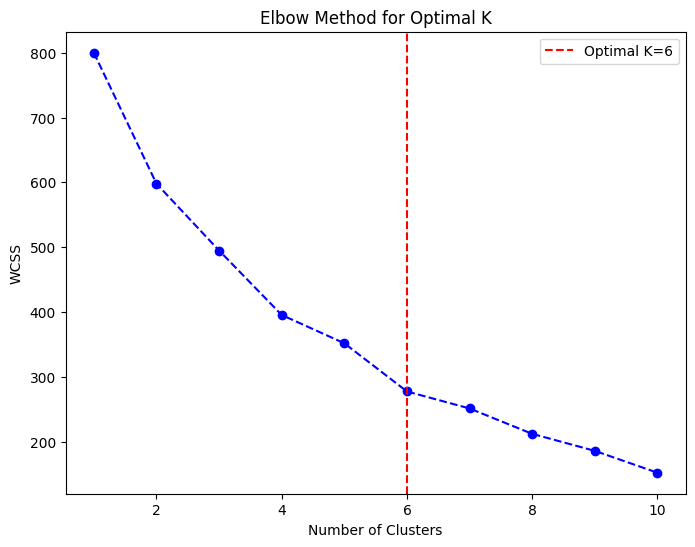

In [51]:
# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, 'o--', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=kl.elbow, color='red', linestyle='--', label=f"Optimal K={kl.elbow}")
plt.legend()
plt.show()

### Using Euclidean Distance and Cosine Similarity for clustering
The two different distance matrix are used for clustering and the silhouette score is calculated

Reference: https://machinelearningmastery.com/distance-measures-for-machine-learning/
This page explains the importance of different distance metrics in clustering algorithms.

Reference: https://www.datastax.com/guides/what-is-cosine-similarity
This resource provided a detailed explanation of cosine similarity and how it's used in clustering.

In [52]:
# K-means clustering with Euclidean distance
euclidean_matrix = euclidean_distances(X_scaled)
kmeans_euclidean = KMeans(n_clusters=6, random_state=42)
kmeans_euclidean_labels = kmeans_euclidean.fit_predict(euclidean_matrix)


# K-means clustering with Cosine similarity
cosine_similarity_matrix = 1 - cosine_similarity(X_scaled)
kmeans_cosine = KMeans(n_clusters=6, random_state=42)
kmeans_cosine_labels = kmeans_cosine.fit_predict(cosine_similarity_matrix)


In [53]:
# Evaluate the clustering performance using silhouette score
silhouette_euclidean = silhouette_score(X_scaled, kmeans_euclidean_labels, metric="euclidean")
silhouette_cosine = silhouette_score(X_scaled, kmeans_cosine_labels, metric="cosine")

print(f"Silhouette Score with Euclidean Distance: {silhouette_euclidean}")
print(f"Silhouette Score with Cosine Similarity: {silhouette_cosine}")



Silhouette Score with Euclidean Distance: 0.26573406555263723
Silhouette Score with Cosine Similarity: 0.5311365676680234


In [54]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



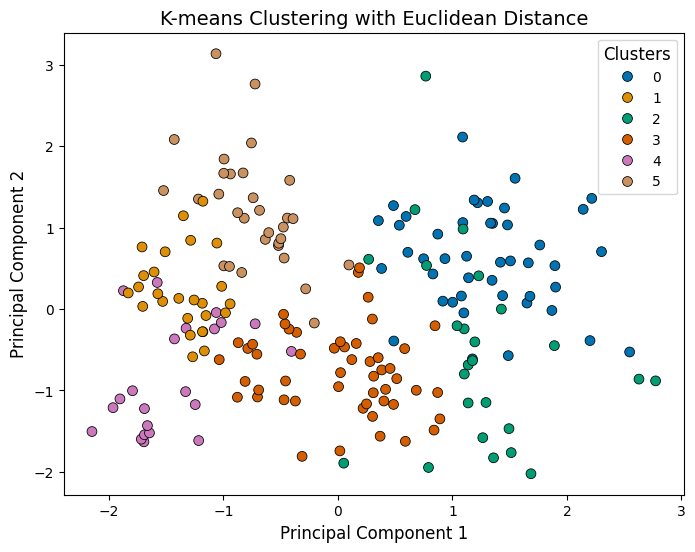

In [55]:
# Create a DataFrame for the PCA-reduced data and cluster labels
df_pca = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': kmeans_euclidean_labels
})
# Define a color palette
palette = sns.color_palette('colorblind', len(np.unique(kmeans_euclidean_labels)))

# Create the scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot( data=df_pca, x='PCA1',  y='PCA2',  hue='Cluster',  palette=palette,  s=50, edgecolor='k')
# Add plot customization
plt.title("K-means Clustering with Euclidean Distance", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# Display the legend
plt.legend(title='Clusters', loc='best', fontsize=10, title_fontsize=12)
plt.show()

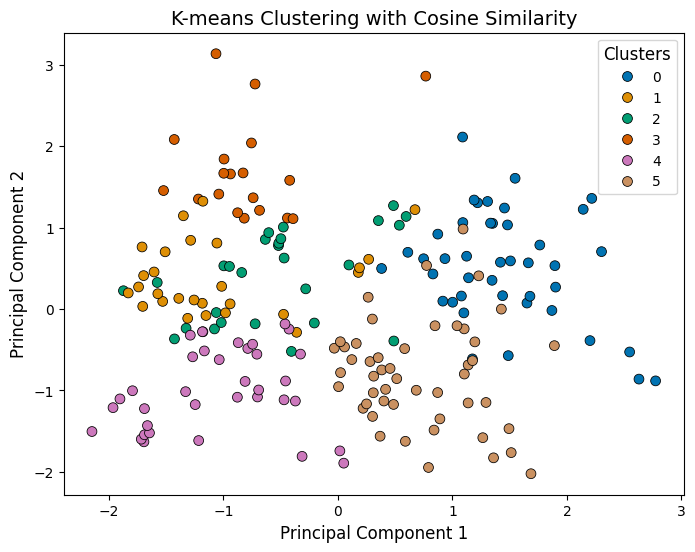

In [56]:
# Create a DataFrame for the PCA-reduced data and cluster labels
df_pca2 = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': kmeans_cosine_labels
})
# Define a color palette
palette = sns.color_palette('colorblind', len(np.unique(kmeans_cosine_labels)))

# Create the scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot( data=df_pca2, x='PCA1',  y='PCA2',  hue='Cluster',  palette=palette,  s=50, edgecolor='k')


# Add plot customization
plt.title("K-means Clustering with Cosine Similarity", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title='Clusters', loc='best', fontsize=10, title_fontsize=12)
plt.show()

In [57]:
# Add cluster labels for both metrics
df['Cluster_Euclidean'] = kmeans_euclidean_labels
df['Cluster_Cosine'] = kmeans_cosine_labels


In [62]:
# Group by Euclidean clusters
cluster_summary_euclidean = df.groupby('Cluster_Euclidean').mean()

# Group by Cosine clusters
cluster_summary_cosine = df.groupby('Cluster_Cosine').mean()

# Print summaries
print("Cluster Summary for Euclidean Distance:")
print(cluster_summary_euclidean)

print("\nCluster Summary for Cosine Similarity:")
print(cluster_summary_cosine)

Cluster Summary for Euclidean Distance:
                     Gender        Age  Annual Income (k$)  \
Cluster_Euclidean                                            
0                  1.000000  49.111111           62.688889   
1                  0.000000  29.807692           81.192308   
2                  0.120000  51.960000           63.240000   
3                  0.000000  39.705882           54.607843   
4                  0.409091  24.545455           25.136364   
5                  1.000000  29.709677           72.935484   

                   Spending Score (1-100)  Cluster_Cosine  
Cluster_Euclidean                                          
0                               30.377778        0.222222  
1                               76.115385        1.576923  
2                               22.480000        4.160000  
3                               43.490196        4.352941  
4                               78.363636        3.181818  
5                               70.645161  

Additional Reference:
https://www.geeksforgeeks.org/k-means-clustering-introduction/
The resource helped me understand the basic principles and steps in the K-Means algorithm.

Final Reference:
https://medium.com/@shekhawatshivani96/worked-examples-for-distance-similarity-measures-in-clustering-d4e14855f52d
This article provides worked examples for using different distance/similarity measures in clustering.